# Cox Model


prepared by 서인교


Survival analysis

Survival analysis can measure the time it takes for a particular event to occur. Also Survival analysis can analyze and evaluate incident occurrence times and factors if there are factors that influence the occurrence of the incident. Interruption is a way to handle data lost in survival analysis. Ideally, the survival time should be known through the specimen's birthday and death date, but if not, use premature amputation. Methods for describing survival time include Life tables, Kaplan-Meier curves, Survival function, and Hazard function. In addition, the methods for describing the effects of continuous and categorical variables on survival time are Cox proportional hazards regression model, Parametric survival models, Survival trees, and survival. There are Survival random forests and so on.
Survival analysis is often used in medicine, but it is also used in marketing and engineering.

● Establishment of business plan: Establish a strategy by grasping the characteristics of customers who have a long remaining period without leaving

● Effective customer: Predict whether the customer is valid up to a specific point in time

● Campaign evaluation: Monitor campaign effectiveness based on customer withdrawal rate (survival rate)

● Retail: How long does it take a customer to buy fresh food to buy non-fresh food?

● Manufacturing: Machine parts lifetime

● Public: Time it takes for a socially important event to occur

● Catalog mail order: Time required for the next order

● Mortgage: Time to repay a mortgage

● Insurance: Time required for insurance policy extinguishment

● Traffic: The time it takes for traffic control to violate the driver's first law, the time it takes to handle a highway traffic accident, and the section length affected by overspeed prevention. 


## I. Glance of Theoretical Background

#### 1. Theoretical Background : parametric models of duratio

* The cumulative probability is 

$$
F(t) = \int^{t}_{0} f(s) ds = Prob(T \leq t)
$$

* The survival function

$$
S(t) = 1 - F(t) = Prob(T \geq t)
$$

* Given that it has survived until time t, what is the probability that it will die the next short interval of time, say, $\Delta t$ ?

$$
l(t, \Delta t) = Prob(t \leq T \leq t + \Delta t \mid T \geq t)
$$

$$
F(t) = \int^{t}_{0} f(s) ds = Prob(T \leq t) 
$$

* hazard rate 

$$
\lambda (t) = \lim_{\Delta t \to 0} \frac{Prob(t \leq T \leq t + \Delta t \mid  T \geq t)}{ \Delta t} = \lim_{\Delta \to 0} \frac{F(t + \Delta t) - F(t))}{\Delta t S(t)} = \frac{f(t)}{S(t)}
$$

Roughly, the hazard rate is the rate at which spells are completed after duration t, given that they last at least until t.

$$
\lambda (t) = \frac{-d lnS(t)}{dt}
$$

$$
f(t) = S(t) \lambda(t)
$$

* intergrated hazard function

$$
\Lambda (t) = \int^{t}_{0} \lambda (s) ds
$$

$$
S(t) = e^{-\Lambda (t)}
$$

$$
\Lambda (t) = -lnS(t)
$$

### 2. Models of the Hazard Function

(1) Exponential $\lambda (t) = \lambda$, $S(t) = e^{-\lambda t}$ : $\lambda(t)$ constant

(2) Weibull $\lambda(t) = \lambda p ( \lambda t)^{p-1}$, $S(t) = e^{-( \lambda t )^{p}}$ : $\lambda(t)$  monotonically increasing or decreasing depending on p

(3) Lognormal $f(t) = (p/t)\phi [p ln(\lambda t]$, $S(t) = \Phi [-p ln( \lambda t)] $ where mean -ln $( \lambda t)$ and standard deviation $1/p$ : $\lambda(t)$  increasing and then decreasing

(4) Loglogistic $\lambda(t) = \lambda p ( \lambda t )^{p-1} / [1 + ( \lambda t )^{}p]$ with mean $ -ln \lambda$ and variance $\pi^{2}/(3p^{2})$   : $\lambda(t)$  increasing and then decreasing

### 3. Maximum Likelihood Estimation : estimating $\lambda$ and $p$ by BHHH estimator or actual second derivatives with asymtotic standard error

$ln L(\theta) = \sum_{uncensored \\ observations} lnf(t \mid \theta ) + \sum_{censored \\ observations} ln S(t \mid \theta )$ where $\theta = (\lambda , p)$

$ln L(\theta) = \sum_{uncensored \\ observations} ln \lambda (t \mid \theta ) + \sum_{all \\ observations} ln S(t \mid \theta )$ where log-likelihood function in terms of  $f(t) = \lambda (t) S (t)$

ex) MLE solution of Weibull model for $\lambda$ and $p$: the transformation to $w = p(lnt + ln\lambda )$ then $f(w) = exp[w - exp(w)]$ and $S(w) = exp(-exp(w))$. more details in Kalbfleisch and Prentice(2002)

#### How to measure better fit across other models?

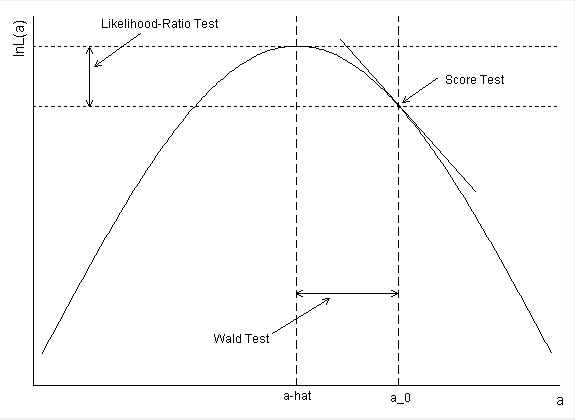

In [24]:
library("IRdisplay")
display_png(file="threetests.png") 

x-axis : parameter a

y-axis : the value of the likelihood at the appropriate value of a

$$
H_{0} : \beta_{1} = \beta_{2} = \beta_{3} = \beta_{4} = 0
$$

(1) The Wald test assumes that the likelihood is normally distributed, and on that basis, uses the degree of curvature to estimate the standard error. Then, the parameter estimate divided by the SE yields a 𝑧-score. This holds under large 𝑁, but isn't quite true with smaller 𝑁s. It is hard to say when your 𝑁 is large enough for this property to hold, so this test can be slightly risky.

(2) Likelihood ratio tests look at the ratio of the likelihoods (or difference in log likelihoods) at its maximum and at the null. This is often considered the best test.

(3) The score test is based on the slope of the likelihood at the null value. This is typically less powerful, but there are times when the full likelihood cannot be computed and so this is a nice fallback option.

### 4. Accelerated failure time models : Adding Exogenous Variables

$\lambda_{i} = e^{- \boldsymbol{x}_{i}' \boldsymbol{ \beta}} $ where $\boldsymbol{x}$ is a constant term

Let $\sigma = \frac{1}{p}$ and let $\delta_{i} = 1$ if completed, let $\delta_{i} = 0$ if censored

$$w_{i} = pln(\lambda_{i}t_{i}) = \frac{lnt_{i} - \boldsymbol{x'_{i}} \beta}{\sigma}$$

$$
lnt_{i} = \sigma w_{i} + \boldsymbol{x'_{i} \beta}
$$

The Jacobian of the transformation from $w_{i}$ to $lnt_{i}$ is $1/\sigma$ then we can derive

$$
f(ln \, t_{i}) = \frac{1}{\sigma} f \Big( \frac{ln \, t_{i} - \boldsymbol{x'_{i} \beta}}{\sigma} \Big), \,\,\,\, S(ln \, t_{i} \mid \boldsymbol{x_{i}, \beta}, \sigma) = S \Big( \frac{ln \, t_{i} - \boldsymbol{x'_{i} \beta}}{\sigma} \Big)
$$

The log likelihood for the ovserved data for all models is

$$
ln L( \boldsymbol{\beta}, \sigma \mid data) = \sum^{n}_{i=1} [\delta_{i} \, ln f(ln \, t_{i} \mid \boldsymbol{x_{i}, \beta}, \sigma ) + (1 - \delta_{i} ) ln \, S(ln \, t_{i} \mid \boldsymbol{x_{i}, \beta}, \sigma )]
$$

For example, Weibull model that follows

$$
f(w_{i}) = exp(w_{i} - e^{w_{i}})
$$

$$
S(w_{i}) = exp(-e^{w_{i}})
$$

$$
ln \, L( \boldsymbol{\beta}, \sigma \mid data) = \sum_{i} \Big[ \delta_{i} \Big( \frac{ln \, t_{i} - \boldsymbol{x'_{i} \beta}}{\sigma} - ln \sigma \Big) - exp \Big( \frac{ln \, t_{i} - \boldsymbol{x'_{i} \beta }}{\sigma} \Big) \Big]
$$

which is the exponential model when $\sigma$ is 1 

* Weibull and exponential models,

$E[t \mid \boldsymbol{x_{i}}] = exp( \boldsymbol{x'_{i} \beta} ) \, \Gamma [(1/p) + 1]$

* Lognormal and loglogistic models,

$E[ln \, t \mid \boldsymbol{x_{i}}] = \boldsymbol{x'_{i}\beta} $

### 5. Heterogeneity

* unobserved heteroeneity casues that
* model signification is incomplete,
* systematic individual difference is incountered
* remedies are non/semiparametric approaches

* One direct approach is to model heterogeneity in the parametric model

individual specific effect $v_{i}$ then counterpart to the incorporation of a disturbance in a regression model

$$
S(t) = E_{v} [S(t \mid v)] = \int_{v} S(t \mid v) f(v) dv
$$

the gamma distribution is frequently used for this purpose. Hausman, Hall, and Griliches(1984)

Example of the Weibull model,

$$
f(v) = \frac{k^{k}}{\Gamma (k)} e^{-kv}v^{k-1}, \, S(t \mid v) = e^{-(v\lambda t)^{p}}
$$

$$
S(t) = \int^{\infty}_{0} S(t \mid v) f(v) dv = [1 + \theta (\lambda t)^{p} ]^{1/\theta}
$$

it thends to overparameterize the survival distribution. Heckman and Singer(1984b)

### 6. Kaplan-Meier (1958)

* largely immune to the problem
* but is limited in how much information can be obtained from it

$$
\hat{S}(T_{k})  = \prod^{k}_{i=0} \frac{n_{i} - h_{i}}{n_{i}}
$$

$$
\hat{\lambda}(T_{k}) = \frac{h_{k}}{n_{k}} \tag{#}
$$

(#) is not a rate and the width of the time window is undefined, which Susin(2001) pointed out and he proposed the following

$$
\hat{\lambda}((I^{b}_{a}) = \frac{ \sum^{b}_{j=a} h_{j}  }{ \sum^{b}_{j=a} n_{j}b_{j} }
$$

### 7. Proportional Hazard model by Cox's(1972)

$$
\lambda (t_{i}) = exp(\boldsymbol{x'_{i}\beta})\lambda_{0}(t_{i}) : log-linear \, \, regression
$$

* one individual in risk set $R_{k}$ exits at time $T_{k}$

$$
Prob[t_{i} = T_{k} \mid risk \, set_{k} ] = \frac{e^{\boldsymbol{x'_{i}}\beta}}{\sum_{j \in R_{k}} e^{\boldsymbol{x'_{j}\beta}}}
$$

* partial log likelihood with no censored observations

$$
ln \, L = \sum^{K}_{k=1} \Big[ \boldsymbol{x'_{i}\beta} - ln \sum_{j \in R_{k}}e^{\boldsymbol{x'_{i}\beta}} \Big]
$$

$$
exp(\beta_{i})-1 \approx E \Big[ \frac{y_{t} \mid_{X=x+1} - y_{t} \mid_{X=x}}{y_{t} \mid_{X=x}} \Big]
$$

where $y_{t}$ = $\lambda(t)/\lambda_{0}(t)$ and $x_{i}$ is a factorized variable from dummy variable

In [3]:
fit <- coxph(Surv(time, status) ~ age, data = kidney)

* The Breslow estimator ( the exponential of the cumulative hazard )

$$
\hat{\Lambda}_{0}(t) = \sum^{n}_{i=1} \int^{t}_{0} \frac{dN_{i}(u)}{\sum^{n}_{j=1} Y_{j}(u)e^{\hat{\beta^{T}}Z_{j}(u)}}
$$

In [184]:
lambda0.t <- basehaz(fit, centered = FALSE)

$$
\hat{\Lambda}(t) = \hat{\Lambda}_{0}(t) exp(60 \beta )
$$

In [177]:
lambda.t <- lambda0.t$hazard * exp(60 * fit$coefficients)

$$
\hat{S}(t) = exp(-\hat{H}(t))
$$

In [178]:
S <- exp(- lambda.t)

In [181]:
head(data.frame(time = lambda0.t$time, Surv = S))

time,Surv
2,0.9859540
4,0.9859540
5,0.9859540
6,0.9859540
7,0.9562571
8,0.9266329


In [ ]:
summary(survfit(fit, newdata = data.frame(age = 60)))

$\hat{\beta}$ and $\hat{\Lambda}_{0}(\cdot)$ are consistent and asymtotically normal and asymtotically efficient. Anderson et al. 1992

## II. Cox model in R

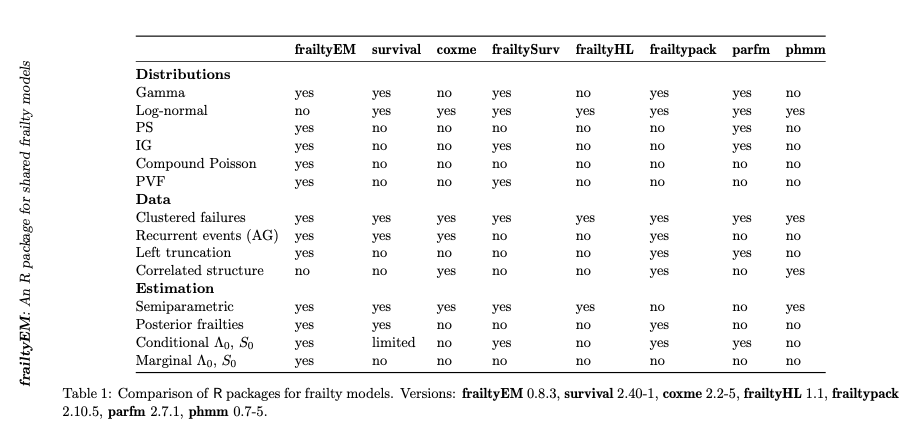

In [95]:
library(IRdisplay)
display_png(file="coxRpackages.png") 

frailtyEM : Expactation-Maximizaion algorithm

survival : penalized modeling

coxme : Laplase approximation

phmm : Monte Carlo Expectation-Maximization 

frailtyHL : h-likehood

### 1. Time dependent coefficient

In [108]:
vfit <- coxph(Surv(time, status) ~ trt + prior + karno, veteran)

In [109]:
vfit

Call:
coxph(formula = Surv(time, status) ~ trt + prior + karno, data = veteran)

           coef exp(coef)  se(coef)      z     p
trt    0.180197  1.197453  0.183468  0.982 0.326
prior -0.005551  0.994464  0.020225 -0.274 0.784
karno -0.033771  0.966793  0.005114 -6.604 4e-11

Likelihood ratio test=43.04  on 3 df, p=2.41e-09
n= 137, number of events= 128 

In [122]:
zp1 <- cox.zph(vfit, transform= function(time) log(time +20))
#zp2 <- cox.zph(vfit, transform= "km", global=TRUE)

### Note : cox.zph function checks Schoenfeld residuals against the transformed time
Having very small p values indicates that there are time dependent coefficients which you need to take care of.

[1] "Having very small p values indicates that there are time dependent coefficients which you need to take care of."


           rho  chisq       p
trt    -0.0598  0.477 0.48976
prior  -0.1535  3.213 0.07307
karno   0.2890  9.951 0.00161
GLOBAL      NA 12.133 0.00694

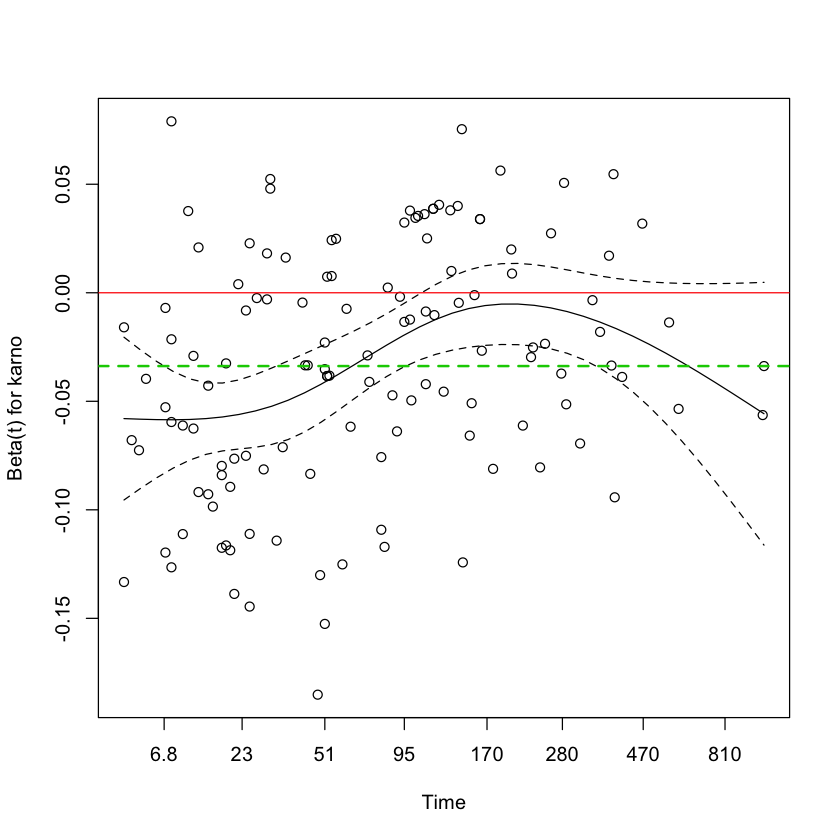

In [143]:
print("Having very small p values indicates that there are time dependent coefficients which you need to take care of.")
zp1

plot(zp1[3])
abline(0,0, col=2)
abline(h= vfit$coef[3], col=3, lwd=2, lty=2)

### (a). Step function

In [124]:
vet2 <- survSplit(Surv(time, status) ~ ., data= veteran, cut=c(90, 180), episode= "tgroup", id="id")

In [132]:
head(veteran)
vet2[1:7, c("id", "tstart", "time", "status", "tgroup", "age", "karno")]

trt,celltype,time,status,karno,diagtime,age,prior
1,squamous,72,1,60,7,69,0
1,squamous,411,1,70,5,64,10
1,squamous,228,1,60,3,38,0
1,squamous,126,1,60,9,63,10
1,squamous,118,1,70,11,65,10
1,squamous,10,1,20,5,49,0


id,tstart,time,status,tgroup,age,karno
1,0,72,1,1,69,60
2,0,90,0,1,64,70
2,90,180,0,2,64,70
2,180,411,1,3,64,70
3,0,90,0,1,38,60
3,90,180,0,2,38,60
3,180,228,1,3,38,60


In [190]:
vfit2 <- coxph(Surv(tstart, time, status) ~ trt + prior + karno:strata(tgroup), data=vet2)

### Now Karnofsky satisfies proportionality assumption!

In [144]:
cox.zph(vfit2)

                                 rho  chisq      p
trt                          -0.0893 1.1044 0.2933
prior                        -0.1645 3.6083 0.0575
karno:strata(tgroup)tgroup=1  0.0333 0.1084 0.7419
karno:strata(tgroup)tgroup=2 -0.0212 0.0431 0.8355
karno:strata(tgroup)tgroup=3  0.0208 0.0496 0.8237
GLOBAL                            NA 5.0675 0.4077

### Karnofsky has now 3 coefficients to interpret

In [145]:
vfit2$means

trt                        prior 
                    1.471111                     2.977778 
karno:strata(tgroup)tgroup=1 karno:strata(tgroup)tgroup=2 
                   35.662222                    19.022222 
karno:strata(tgroup)tgroup=3 
                    8.444444

In [154]:
cdata <- data.frame(tstart= rep(c(0,90,180), 2),
                    time =  rep(c(90,180, 365), 2), 
                    status= rep(0,6),   #necessary, but ignored
                    tgroup= rep(1:3, 2), 
                    trt  =  rep(1,6),
                    prior=  rep(0,6),
                    karno=  rep(c(40, 75), each=3),
                    id =  rep(1:2, each=3))

In [155]:
cdata

tstart,time,status,tgroup,trt,prior,karno,id
0,90,0,1,1,0,40,1
90,180,0,2,1,0,40,1
180,365,0,3,1,0,40,1
0,90,0,1,1,0,75,2
90,180,0,2,1,0,75,2
180,365,0,3,1,0,75,2


In [196]:
sfit <- survfit(vfit2, newdata=cdata, id=id)

In [160]:
km <- survfit(Surv(time, status) ~ I(karno>60), veteran) # I = 0/1 : categorical variable

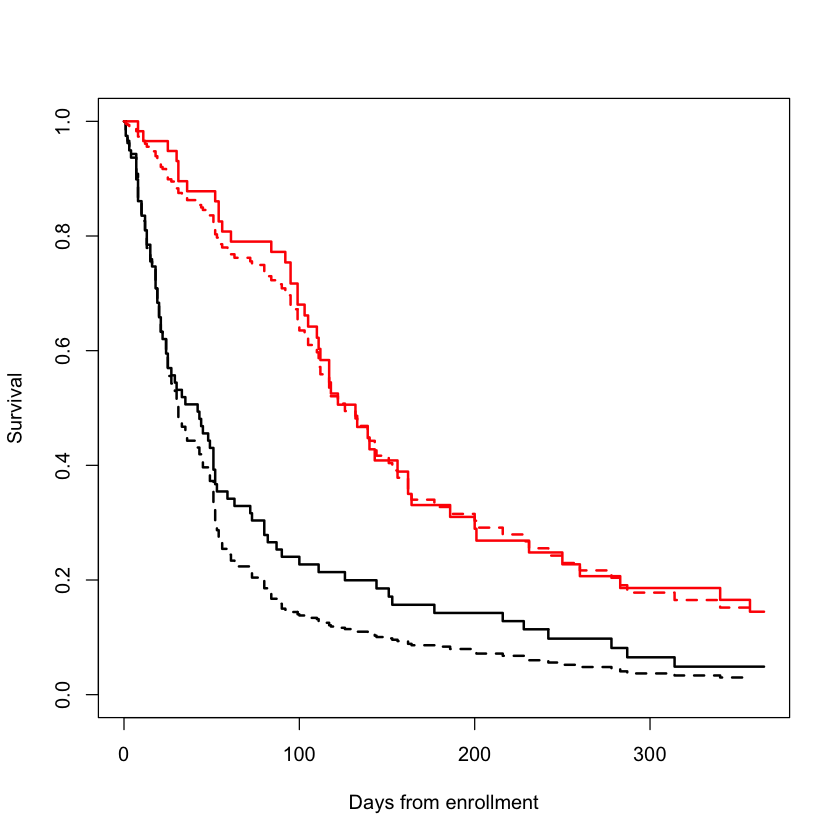

In [192]:
plot(km, xmax= 365, col=1:2, lwd=2, xlab="Days from enrollment", ylab="Survival")
lines(sfit, col=1:2, lty=2, lwd=2)

### (b). Countinuous Time Dependent coefficient

$$
\beta (t) = a + b log(t)
$$

$$
\beta (t)x = ax + b log(t)x = ax + bz
$$

$$
z = log(t)x
$$

$log(t+20)$ due to the fact that the first 20 days of the plot roughly linear.

* Wrong code

In [198]:
vfit3 <- coxph(Surv(time, status) ~ trt + prior + karno + I(karno * log(time + 20)), data=veteran)

* Right code

In [209]:
vfit3 <-  coxph(Surv(time, status) ~ trt + prior + karno + tt(karno), data=veteran, tt = function(x, t, ...) x * log(t+20))

In [210]:
vfit3

Call:
coxph(formula = Surv(time, status) ~ trt + prior + karno + tt(karno), 
    data = veteran, tt = function(x, t, ...) x * log(t + 20))

               coef exp(coef)  se(coef)      z        p
trt        0.016478  1.016614  0.190707  0.086  0.93115
prior     -0.009317  0.990726  0.020296 -0.459  0.64619
karno     -0.124662  0.882795  0.028785 -4.331 1.49e-05
tt(karno)  0.021310  1.021538  0.006607  3.225  0.00126

Likelihood ratio test=53.84  on 4 df, p=5.698e-11
n= 137, number of events= 128 

the estimate is as $\hat{\beta}_{karno} (t) = -0.1245662 + 0.02131 \cdot log(t+20)$

* cox.zph plot

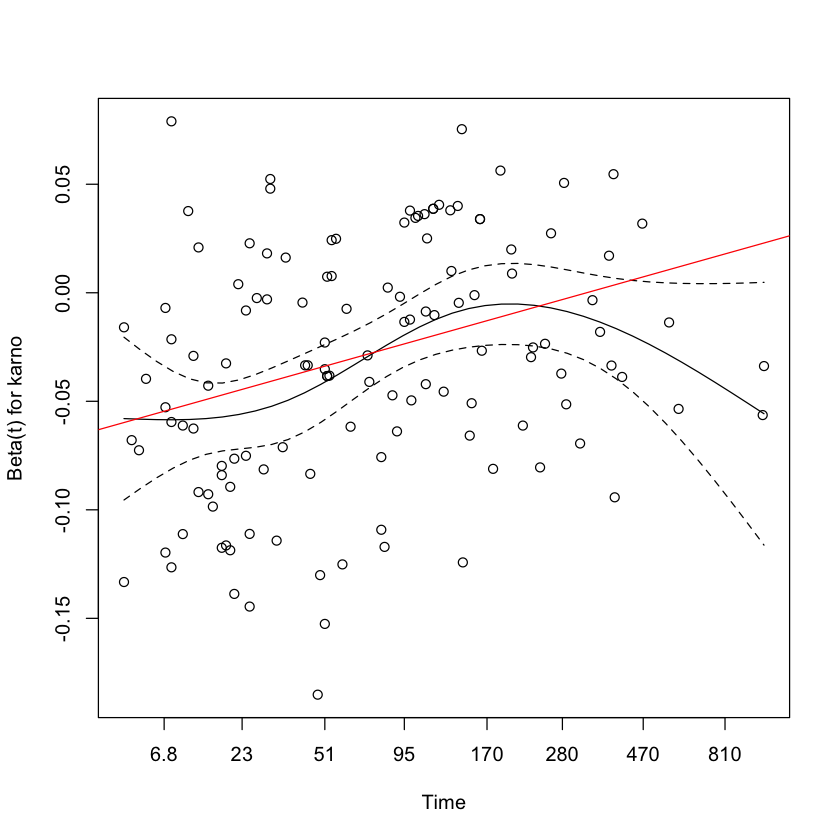

In [213]:
plot(zp1[3])
abline(coef(vfit3)[3:4], col=2)

* presence of diabetes as time dependent covariate

In [214]:
data1 <- read.table(col.names=c("id", "diabetes", "lfu", "status"),
                           header=FALSE, text="1 5 30 1
                                               2 10 15 1 
                                               3 NA 60 0 
                                               4 NA 80 1 
                                               5 10 80 0 
                                               6 NA 90 1 
                                               7 30 95 1")

In [224]:
data1$d2 <- pmin(data1$diabetes, 300, na.rm=TRUE) #replace NA with 300
data1

id,diabetes,lfu,status,d2
1,5,30,1,5
2,10,15,1,10
3,NA,60,0,300
4,NA,80,1,300
5,10,80,0,10
6,NA,90,1,300
7,30,95,1,30


* Correct

In [218]:
fit1 <- coxph(Surv(lfu, status) ~ tt(d2), data=data1,
               tt = function(d2, t, ...) ifelse(t > d2, 1, 0))

* Incorrect

In [227]:
fit2 <- coxph(Surv(lfu, status) ~ tt(d2), data=data1,
               tt = function(d2, t, ...) ifelse(t < d2, 0, 1))

In [226]:
c(coef(fit1), coef(fit2))

tt(d2)    tt(d2) 
0.2439561 0.2439561

In [229]:
data2 <- tmerge(data1, data1, id=id, dstat=event(lfu, status),
                 diab = tdc(diabetes))

In [230]:
fit3 <- coxph(Surv(tstart, tstop, dstat) ~ diab, data2)

In [231]:
c(coef(fit1), coef(fit3))

tt(d2)      diab 
0.2439561 0.2439561

### (c). Time Dependent Covariate

The Basic Cox model assumes $\lambda_{i}/\lambda_{j}$ remains constant over time 

$$
\frac{e^{\boldsymbol{x'_{i}}\beta}}{\sum_{j \in R_{k}} e^{\boldsymbol{x'_{j}\beta}}} = \frac{e^{\boldsymbol{(x_{i}+t_{i})'}\beta}}{\sum_{j \in R_{k}} e^{\boldsymbol{(x_{j} +t_{i})'\beta}}}
$$

the equality doesn't satisfy when effect of $age$ on risk is non-linear but a $very\, large\, data\, set$ lossen the limit

$$
\eta_{i}(t) = x_{i1}\beta_{1} + x_{i2}\beta_{2} + \cdots + x_{ij}(t) \beta_{j}
$$

$x_{ij}(t)$ is most recent measured value of the coefficient

* Mayo Clinic Primary Biliary Cirrhosis Data

In [19]:
?pbc

pbc {survival},R Documentation
age:,in years
albumin:,serum albumin (g/dl)
alk.phos:,alkaline phosphotase (U/liter)
ascites:,presence of ascites
ast:,"aspartate aminotransferase, once called SGOT (U/ml)"
bili:,serum bilirunbin (mg/dl)
chol:,serum cholesterol (mg/dl)
copper:,urine copper (ug/day)
edema:,"0 no edema, 0.5 untreated or successfully treated"
,1 edema despite diuretic therapy


In [20]:
head(pbc)

id,time,status,trt,age,sex,ascites,hepato,spiders,edema,bili,chol,albumin,copper,alk.phos,ast,trig,platelet,protime,stage
1,400,2,1,58.76523,f,1,1,1,1.0,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4
2,4500,0,1,56.44627,f,0,1,1,0.0,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3
3,1012,2,1,70.07255,m,0,0,0,0.5,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4
4,1925,2,1,54.74059,f,0,1,1,0.5,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4
5,1504,1,2,38.10541,f,0,1,1,0.0,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3
6,2503,2,2,66.25873,f,0,1,0,0.0,0.8,248,3.98,50,944.0,93.00,63,NA,11.0,3


In [15]:
pfit1 <- coxph(Surv(time, status==2) ~ log(bili) + ascites + age, pbc)

In [13]:
pfit2 <- coxph(Surv(time, status==2) ~ log(bili) + ascites + tt(age), data=pbc, tt=function(x, t, ...) {age <- x + t/365.25 
                                                                                                        cbind(age=age, age2= (age-50)^2, age3= (age-50)^3)
})
pfit2

Call:
coxph(formula = Surv(time, status == 2) ~ log(bili) + ascites + 
    tt(age), data = pbc, tt = function(x, t, ...) {
    age <- x + t/365.25
    cbind(age = age, age2 = (age - 50)^2, age3 = (age - 50)^3)
})

                  coef  exp(coef)   se(coef)      z        p
log(bili)    1.049e+00  2.854e+00  9.453e-02 11.093  < 2e-16
ascites      1.291e+00  3.635e+00  2.629e-01  4.909 9.15e-07
tt(age)age   6.660e-02  1.069e+00  1.469e-02  4.533 5.82e-06
tt(age)age2  3.040e-04  1.000e+00  1.241e-03  0.245   0.8065
tt(age)age3 -9.171e-05  9.999e-01  4.998e-05 -1.835   0.0665

Likelihood ratio test=178.9  on 5 df, p=< 2.2e-16
n= 312, number of events= 125 
   (106 observations deleted due to missingness)

In [292]:
anova(pfit1, pfit2) # fail

ERROR: Error in UseMethod("anova"): no applicable method for 'anova' applied to an object of class "list"


In [16]:
2*(pfit2$loglik - pfit1$loglik)[2]

[1] 10.80621

In [1]:
qchisq(0.99,1)

[1] 6.634897

## 2. Recurrent events and multistate models

#### (a). Multiplestate Models : Homogeneous Markov model, Nonhomogeneous Markov model, Markov Renewal model

* Nonhomogeneous Markov model ; modeling transition rates $\lambda(t)$ is a function of time t as total time on study

* Markov Renewal model ; modeling transition rates $\lambda(t)$ is a function of time t since arriving at the current state

#### 4.2. Recurrent Event

In [10]:
head(bladder2)

id,rx,number,size,start,stop,event,enum
1,1,1,3,0,1,0,1
2,1,2,1,0,4,0,1
3,1,1,1,0,7,0,1
4,1,5,1,0,10,0,1
5,1,4,1,0,6,1,1
5,1,4,1,6,10,0,2


In [15]:
fit <- coxph(Surv(start, stop, event) ~ rx + number + size + factor(enum), bladder2)

,rho,chisq,p
age,0.08759496,0.4718516,0.4921366


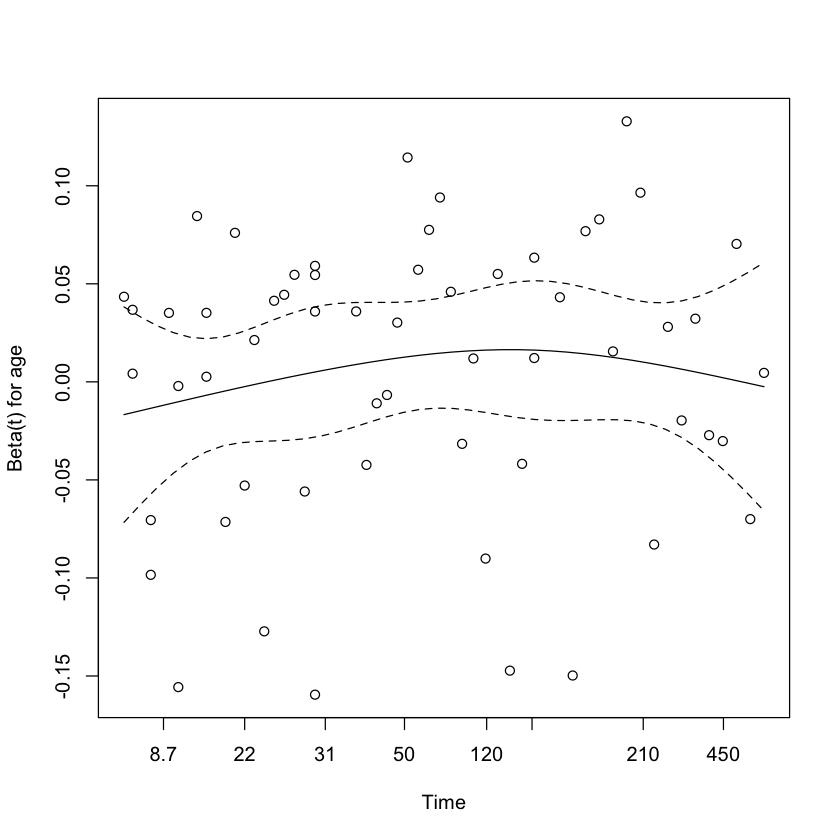

In [197]:
temp <- cox.zph(fit, transform="km", global=TRUE)
temp$table
plot(temp)

#### Stratification

$$
\lambda_{ij} = \lambda_{0j} exp(\boldsymbol{x^{T}_{i}\beta})
$$

$$
L(\beta) = \prod_{j} L_{j}(\beta)
$$

* It is important to note, however, that using the number of
recurrent events experienced so far as a time-dependent
covariate assumes proportional hazards across the different
recurrences

* This is probably an unrealistic assumption; as an alternative,
we might consider allowing each recurrent failure to have its
own baseline distribution

* Recall that this can be accomplished through stratification
(this time, on a time-dependent covariate) in the Cox model

#### Gap time models

* Finally, we also face a similar decision that we saw in
multi-state modeling: whether to model time to recurrence
since the start of the study, or time since the last recurrence

* The latter type of model is known as a gap time model; to fit
it, we would simply need to reorganize the data as (to revisit
our earlier example):

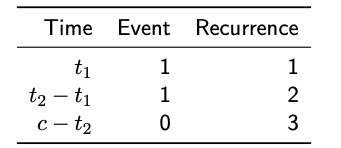

In [56]:
display_png(file="GapModel.png")

* Like origin-time models, we would again have to decide how
to condition on previous recurrences

In [68]:
head(bladder2)

id,rx,number,size,start,stop,event,enum
1,1,1,3,0,1,0,1
2,1,2,1,0,4,0,1
3,1,1,1,0,7,0,1
4,1,5,1,0,10,0,1
5,1,4,1,0,6,1,1
5,1,4,1,6,10,0,2


?bladder2

In [59]:
#fit <- coxph(Surv(start, stop, event) ~ rx + number + size, bladder2)
fit <- coxph(Surv(start, stop, event) ~ rx + number + size + strata(enum), bladder2)
summary(fit)

Call:
coxph(formula = Surv(start, stop, event) ~ rx + number + size + 
    strata(enum), data = bladder2)

  n= 178, number of events= 112 

            coef exp(coef)  se(coef)      z Pr(>|z|)  
rx     -0.333489  0.716420  0.216168 -1.543   0.1229  
number  0.119617  1.127065  0.053338  2.243   0.0249 *
size   -0.008495  0.991541  0.072762 -0.117   0.9071  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

       exp(coef) exp(-coef) lower .95 upper .95
rx        0.7164     1.3958    0.4690     1.094
number    1.1271     0.8873    1.0152     1.251
size      0.9915     1.0085    0.8598     1.144

Concordance= 0.616  (se = 0.038 )
Likelihood ratio test= 6.51  on 3 df,   p=0.09
Wald test            = 6.85  on 3 df,   p=0.08
Score (logrank) test = 6.91  on 3 df,   p=0.07


In [60]:
sfit <- survfit(fit)
sfit

Call: survfit(formula = fit)

       records n.max n.start events median 0.95LCL 0.95UCL
enum=1      85    85      85     47     18      12      38
enum=2      46    25      11     29     16      15      23
enum=3      27    13       1     22      5       5      23
enum=4      20    10       1     14      7       7      32

In [61]:
summary(sfit)

Call: survfit(formula = fit)

                enum=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1     85       3    0.964  0.0202        0.926        1.000
    2     79       8    0.866  0.0377        0.795        0.943
    3     71       8    0.767  0.0469        0.680        0.865
    4     63       2    0.742  0.0486        0.653        0.844
    5     60       3    0.704  0.0508        0.611        0.811
    6     57       4    0.653  0.0532        0.556        0.766
    7     53       1    0.640  0.0537        0.543        0.754
    9     51       2    0.613  0.0546        0.515        0.730
   10     48       1    0.600  0.0550        0.501        0.718
   12     45       2    0.572  0.0560        0.472        0.693
   16     41       1    0.557  0.0564        0.457        0.679
   17     40       3    0.513  0.0575        0.411        0.639
   18     37       1    0.498  0.0577        0.397        0.625
   22     34       1    0.482  0.0580        0.381

,rho,chisq,p
rx,0.04728331,0.2287105,0.6324816
number,-0.05612199,0.3299523,0.5656872
size,-0.05762236,0.3659124,0.5452408
GLOBAL,NA,0.7546628,0.8602774


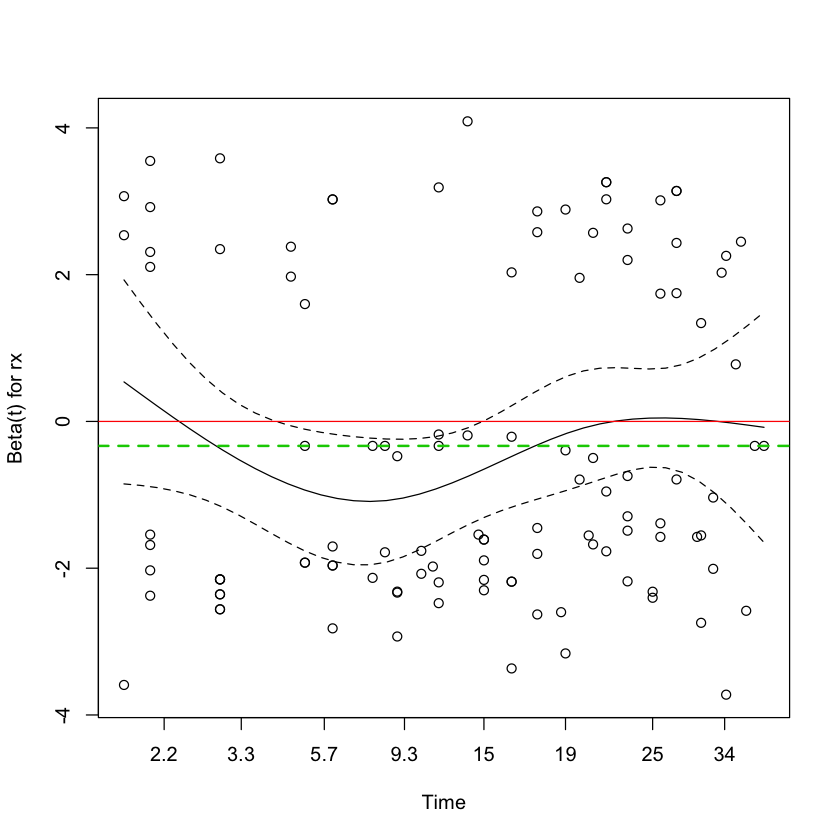

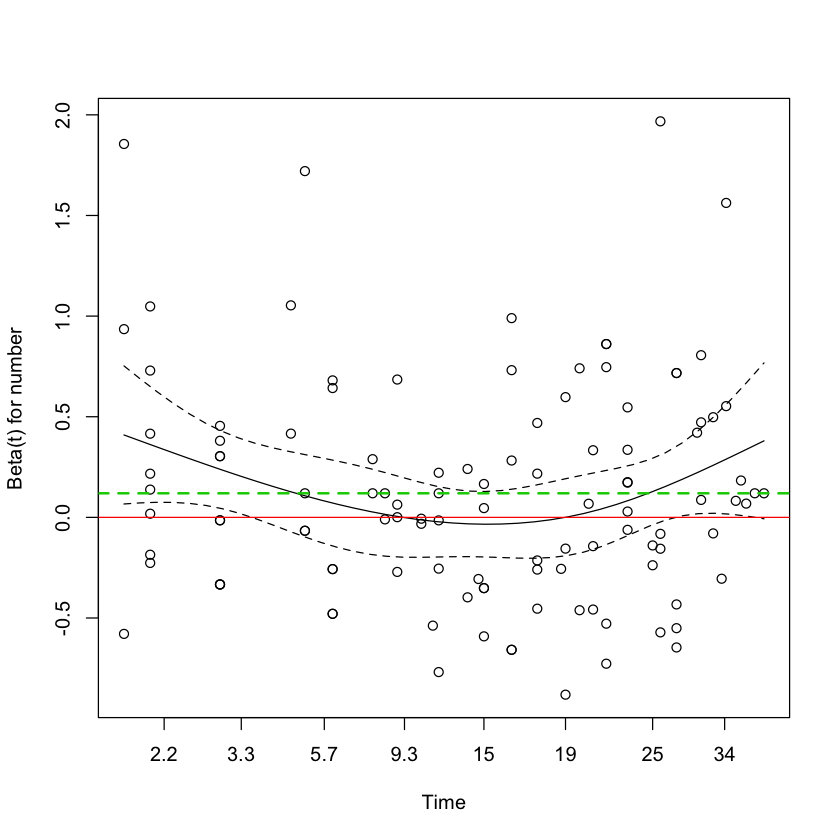

ERROR: Error in x$y[, i, drop = FALSE]: subscript out of bounds


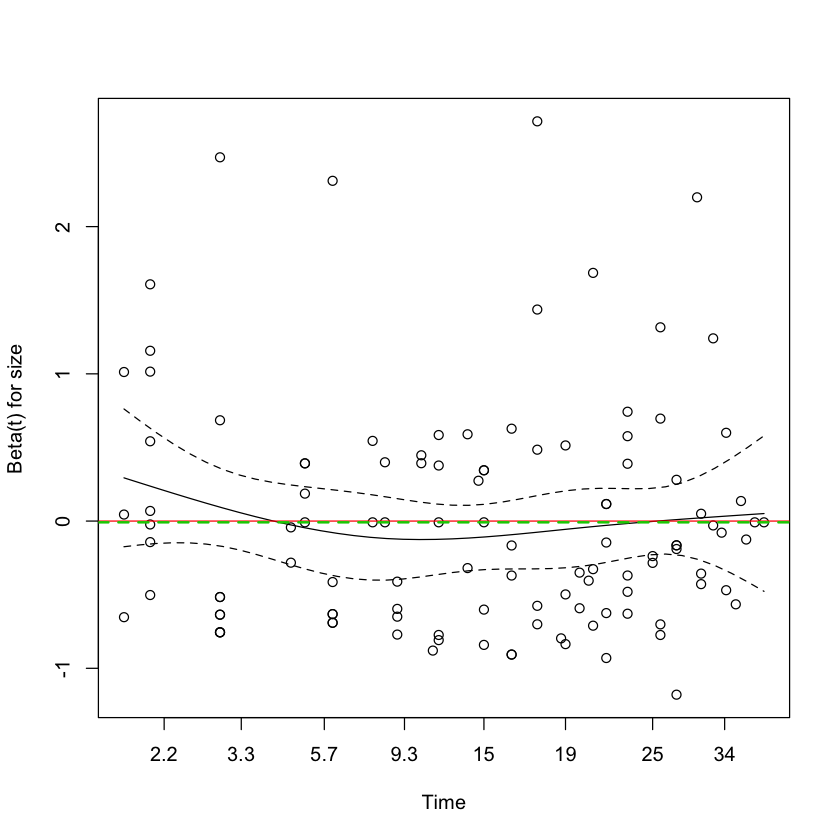

In [62]:
temp <- cox.zph(fit, transform="km", global=TRUE)
temp$table
plot(temp[1])
abline(0,0, col=2)
abline(h= fit$coef[1], col=3, lwd=2, lty=2)

plot(temp[2])
abline(0,0, col=2)
abline(h= fit$coef[2], col=3, lwd=2, lty=2)

plot(temp[3])
abline(0,0, col=2)
abline(h= fit$coef[3], col=3, lwd=2, lty=2)

plot(temp[4])
abline(0,0, col=2)
abline(h= fit$coef[4], col=3, lwd=2, lty=2)

In [84]:
summary(sfit)$table

,records,n.max,n.start,events,*rmean,*se(rmean),median,0.95LCL,0.95UCL
enum=1,85,85,85,47,25.634235,2.400025,18,12,38
enum=2,46,25,11,29,20.885144,3.111550,16,15,23
enum=3,27,13,1,22,8.360755,2.094739,5,5,23
enum=4,20,10,1,14,12.542883,3.416949,7,7,32


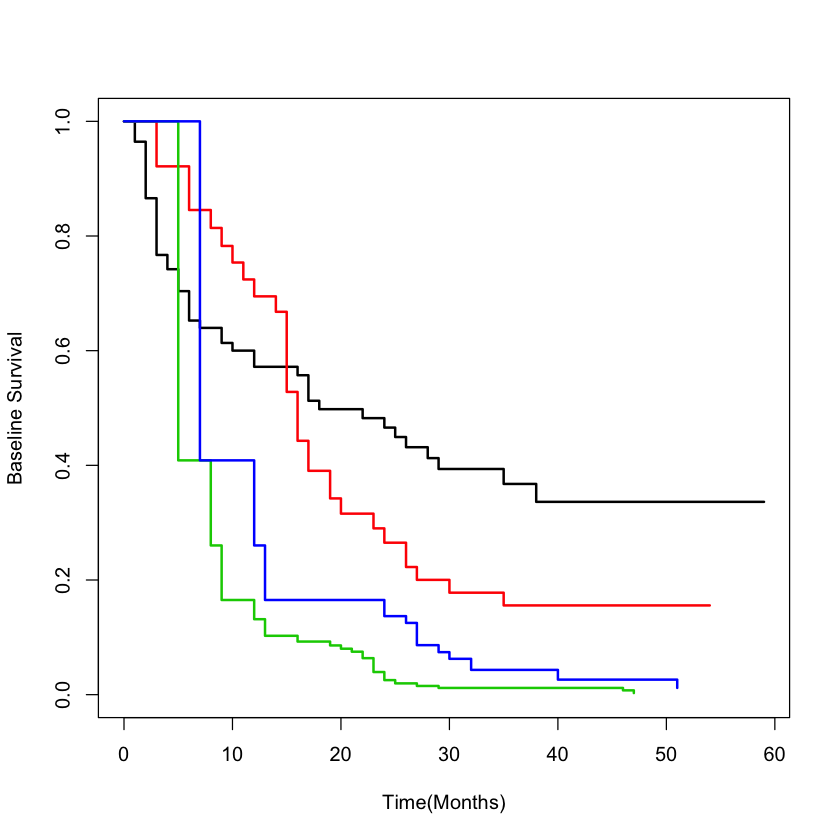

In [64]:
plot(sfit, xmax= 365, col=1:4, lwd=2, xlab="Time(Months)", ylab="Baseline Survival")

In [81]:
#library(dplyr)
bladder2<- bladder2 %>% group_by(id) %>% mutate(gaptime = stop - start) %>% as.data.frame() 
head(bladder2)

id,rx,number,size,start,stop,event,enum,gaptime
1,1,1,3,0,1,0,1,1
2,1,2,1,0,4,0,1,4
3,1,1,1,0,7,0,1,7
4,1,5,1,0,10,0,1,10
5,1,4,1,0,6,1,1,6
5,1,4,1,6,10,0,2,4


In [85]:
#fit <- coxph(Surv(gaptime, event) ~ rx + number + size, bladder2)
fit <- coxph(Surv(gaptime, event) ~ rx + number + size + strata(enum), bladder2)

In [86]:
summary(fit)

Call:
coxph(formula = Surv(gaptime, event) ~ rx + number + size + strata(enum), 
    data = bladder2)

  n= 178, number of events= 112 

            coef exp(coef)  se(coef)      z Pr(>|z|)   
rx     -0.279005  0.756536  0.207348 -1.346  0.17844   
number  0.158046  1.171220  0.051942  3.043  0.00234 **
size    0.007415  1.007443  0.070023  0.106  0.91567   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

       exp(coef) exp(-coef) lower .95 upper .95
rx        0.7565     1.3218    0.5039     1.136
number    1.1712     0.8538    1.0579     1.297
size      1.0074     0.9926    0.8782     1.156

Concordance= 0.596  (se = 0.035 )
Likelihood ratio test= 9.33  on 3 df,   p=0.03
Wald test            = 10.11  on 3 df,   p=0.02
Score (logrank) test = 10.27  on 3 df,   p=0.02


In [91]:
sfit <- survfit(fit)
sfit

Call: survfit(formula = fit)

        n events median 0.95LCL 0.95UCL
enum=1 85     47     18      12      38
enum=2 46     29     13       9      NA
enum=3 27     22      6       5      10
enum=4 20     14      6       5      NA

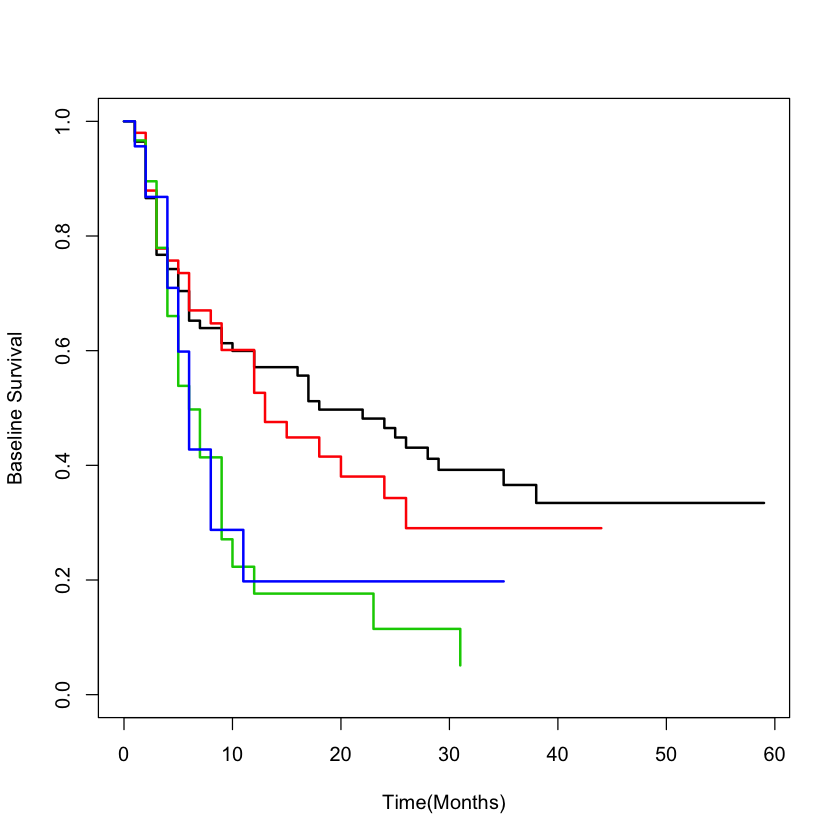

In [93]:
plot(sfit, xmax= 365, col=1:4, lwd=2, xlab="Time(Months)", ylab="Baseline Survival")

## III. EM algorithm

EM Algorithm

1. Introduction

 The EM(Expectation-Maximization) algorithm is a broadly applicable approach to the iterative computation of maximum likelihood estimates, useful in a variety uncompleted data problems. The EM algorithm alternately applies E(Expectation) step and M(Maximizing) step. E step is calculating the expected value of log likelihood as the estimated value of the parameter. M step is of obtaining the estimated values of the parameter that maximize this expected value. These two steps can be understood as an algorithm that alternately finds the optimization value.

2. Description

Given the statistical model which generates 

① a set X of observed data
② a set of unobserved latent data or missing values Z
③ a vector of unknown parameters  along with a likelihood function 

 The maximum likelihood estimate (MLE) of the unknown parameters is determined by maximizing the marginal likelihood of the observed data.

$$L( \theta ; X) = p(X \mid \theta ) = \int _{}^{} {p} (X , Z \mid \theta )dZ= \int _{}^{} {p} (X, Z \mid theta )p( Z \mid \theta )dZ$$

 However, this quantity is often intractable since Z is unobserved and the distribution of Z is unknown before attaining .

 As written in the introduction, The EM algorithm seeks to find the MLE of the marginal likelihood by iteratively applying these two steps:

① E step(Expectation step)

Define  as the expected value of the log likelihood function of , with respect to the current conditional distribution of Z given X and the current estimates of the parameters :

$$ Q( \theta \mid \theta^{(t)} ) = E _{Z \mid X, \theta^{(t)}} [log L( \theta ; X, Z)] $$

② M step(Maximization step)

Find the parameters that maximize this quantity:

$$ \theta^{(t+1)} = {arg max}_{\theta}^{} Q( \theta \mid \theta ^{(t)} ) $$

 * Maximum Likelihood Estimation
 As a parametric data density estimation method, if a sample data set observed in a parameter  consisted probability density function  is , it is a method of estimating parameters θ in these samples.
Reference.

Ng, S. K., Krishnan, T., & McLachlan, G. J. (2012). The EM algorithm. In Handbook of computational statistics (pp. 139-172). Springer, Berlin, Heidelberg.

Expectation-maximization algorithm. Wikipedia. https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm

#### 1. E step : Set Distributions and Expectation

#### 0. base functions

* functions

lgamma(x) = ln(factorial(x-1))

besselK(x, nu, expon.scaled =FALSE) # the modified Bessel function

stats::uniroot(fun, lower = lower, upper = upper)$root # finding zero points : maximizing f by optimize() is the same when to find zero points at f' (derivative of f) and uniroot may be faster but cannot differentiate between minima and maxima

stats::nlm() # nuconstrained optimization, minimization, for more than one dimension and may be better for nonlinear equation

stats::optimize() # minimization or maximization

numDeriv::hessian() # Calculate a numerical approximation to the Hessian matrix of a function at a parameter value and detect whether there is a solution or not

a. parameters and Laplace transform for E step 

In [10]:
dist_to_pars <- function(dist, logfrailtypar, pvfm) {

    if (dist == "gamma") {
        alpha <- bbeta <- exp(logfrailtypar)
        dist_id <- 0L
    }

    if (dist == "stable") {
      alpha <- 1
      bbeta <- exp(logfrailtypar) / (exp(logfrailtypar) + 1)
      dist_id <- 1L
    }

    if (dist == "pvf") {
        alpha <- abs((pvfm + 1)/pvfm * exp(logfrailtypar))
        bbeta <- (pvfm + 1) * exp(logfrailtypar)
        dist_id <- 2L
    }

    list(alpha = alpha, bbeta = bbeta, dist = dist_id)
}

* The E step

\begin{equation}
\mathcal{L}(c) = \frac{E\left[ Z_i^{n_i}  \exp(-Z_i \tilde\Lambda_i) \exp(-Z_i c) \right] }{E\left[ Z_i^{n_i}  \exp(-Z_i \tilde\Lambda_i) \right] } = \frac{\mathcal{L}^{(n_i)}(c + \tilde\Lambda_i)}{\mathcal{L}^{(n_i)}(\tilde\Lambda_i)}.
\label{eq:laplace_transform_estep}
\end{equation}

\begin{equation}
\widehat{z}_i = -\frac{\mathcal{L}^{(n_i +1)}(\tilde\Lambda_i)}{\mathcal{L}^{(n_i)}(\tilde\Lambda_i)}.
\label{eq:estep}
\end{equation}

For the calculation of E step, we take derivate of Laplace transforms of

$$
\mathcal{L}(c) = \exp(g(c))
$$

* Closed forms

The gamma distribution leads to a Laplace transform for which the derivatives can be calculated in closed form. It can be seen that
$$
\mathcal{L}(c;\alpha, \gamma) = \gamma^\alpha (\gamma + c)^{-\alpha}.
$$

The $k$-th derivative of this expression is
$$
\mathcal{L}^{(k)}(c;\alpha, \gamma) = \gamma^\alpha (\gamma + c)^{-\gamma - k} \frac{\Gamma(\alpha + k)}{ \Gamma(\alpha)} .
$$

The inverse gaussian distribution is obtained when the PVF parameter is $m=-\frac{1}{2}$. Under the current parametrization, we have $\beta = \theta / 2$ and $\alpha = \theta$. In this case, the Laplace transform is
$$
\mathcal{L}(c; \theta) = \exp \left\{\theta \left(1 - \sqrt{1 + 2c/\theta }\right) \right\}.
$$
The $k$-th derivative of this can be written as
$$
\mathcal{L}^{(k)}(c; \theta) = (-1)^k \left(\frac{2}{\theta} c + 1\right)^{-k/2} \frac{\mathcal{K}_{k - 1/2} \left(\sqrt{ 2\theta \left(c + \frac{\theta}{2}\right)}\right)}{\mathcal{K}_{1/2} \left( \sqrt{ 2\theta \left(c + \frac{\theta}{2}\right)}\right)}
$$

In [13]:
laplace_transform <- function(x, distribution) {
  # if(missing(.distribution) & missing())
  if(!inherits(distribution, "emfrail_dist"))
    stop("distribution argument misspecified; see ?emfrail_dist()")

  getpars <- dist_to_pars(distribution$dist, log(distribution$frailtypar), distribution$pvfm)

  if(getpars$dist == 0L) {
    L <- with(getpars, (bbeta / (bbeta + x))^alpha)
  }

  if(getpars$dist == 1L) {
    L <- with(getpars, exp(-1 * x^bbeta))
  }

  if(getpars$dist == 2L) {
    L <- with(getpars, exp(-alpha * sign(distribution$pvfm) * (1 - (bbeta / (bbeta + x))^distribution$pvfm )))
  }
  L
}

#### 2. M step : Standard error 

Considering the vector of parameters $\eta = (\beta, \lambda_0(\cdot))$, and consider that for a given $\theta$, $\eta_\theta$ is the maximizer of the "inner problem", i.e. $\eta(\theta) = \mathrm{argmax}_\eta L(\eta | \theta)$.


Let $\hat\theta$ be the maximum likelihood estimate with variance $VAR(\hat\theta)$ and standard error $\mathrm{se}(\hat\theta)$, which are given by the maximizer from the "outer problem". The correct information matrix for inference on $\eta$ is a  "perturbed" version of $VAR(\eta(\hat\theta))$, namely
$$
VAR(\eta(\hat\theta)) +  \left( \frac{d \eta}{ d \theta}\right) VAR(\hat{\theta}) \left( \frac{d\eta}{d\theta} \right)^\top.
$$

In [ ]:
  log_theta_low <- uniroot(function(x, ...) outer_m$minimum - em_fit(x, ...) + 1.92,
                       interval = c(log(control$lik_interval[1]), outer_m$estimate),
                       f.lower = outer_m$minimum - lower_llik + 1.92, f.upper = 1.92,
                       tol = .Machine$double.eps^0.1,
                       dist = distribution$dist,
                       pvfm = distribution$pvfm,
                       Y = Y, Xmat = X, atrisk = atrisk, basehaz_line = basehaz_line,
                       mcox = list(coefficients = g, loglik = mcox$loglik),  # a "fake" cox model
                       Cvec = Cvec, lt = distribution$left_truncation,
                       Cvec_lt = Cvec_lt, se = FALSE,
                       em_control = control$em_control,
                       maxiter = 100)$root

  # this says that if I can't get a significant difference on the right side, then it's infinity
  if(upper_llik  - outer_m$minimum < 1.92) log_theta_high <- Inf else
    log_theta_high <- uniroot(function(x, ...) outer_m$minimum - em_fit(x, ...) + 1.92,
                          interval = c(outer_m$estimate, log(control$lik_interval[2])),
                          f.lower = 1.92, f.upper = outer_m$minimum - upper_llik + 1.92,
                          extendInt = c("downX"),
                          dist = distribution$dist,
                          pvfm = distribution$pvfm,
                          Y = Y, Xmat = X, atrisk = atrisk, basehaz_line = basehaz_line,
                          mcox = list(coefficients = g, loglik = mcox$loglik),  # a "fake" cox model
                          Cvec = Cvec, lt = distribution$left_truncation,
                          Cvec_lt = Cvec_lt, se  = FALSE,
                          em_control = control$em_control)$root
  }
  } else

### Example

Both the Commenges-Andersen test for heterogeneity and the one-sided likelihood ratio test deems the random effect highly significant. This is also suggested by the confidence interval for the frailty variance, which does not contain 0.

### What does Left-truncated data look like?

In [8]:
set.seed(1)

In [9]:
rats$tstart <- rexp(nrow(rats), rate = 1/50)

In [10]:
rats_lt <- rats[rats$tstart < rats$time, ]

In [18]:
head(rats_lt)

,litter,rx,time,status,sex,tstart
1,1,1,101,0,f,37.759092
3,1,0,104,0,f,7.285336
4,2,1,91,0,m,6.989763
5,2,0,104,0,m,21.803431
7,3,1,104,0,f,61.478103
8,3,0,102,0,f,26.984142
